In [2]:
import matplotlib
from matplotlib.colors import to_hex
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.mixture import BayesianGaussianMixture
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from pylab import *
from matplotlib import rc
import matplotlib.ticker as ticker
import seaborn as sn
import folium

from Wind.Util import find_exp, count_exp, sel_result
from Wind.Config.Paths import wind_data_path

cpal = plt.get_cmap('Reds')

coords = np.load(wind_data_path +'/coords.npy')

%matplotlib notebook

# Persistence

In [3]:
query1= {'status':'done', "arch.mode": "persistence", "experiment":"eastwest9597"}

count_exp(query1)
res1 = find_exp(query1)
sites1, coord1 = sel_result(res1,1)

valsum = np.sum(coord1,axis=1)
minsum = np.min(valsum)
rangesum = np.max(valsum) - minsum



1500


<IPython.core.display.Javascript object>


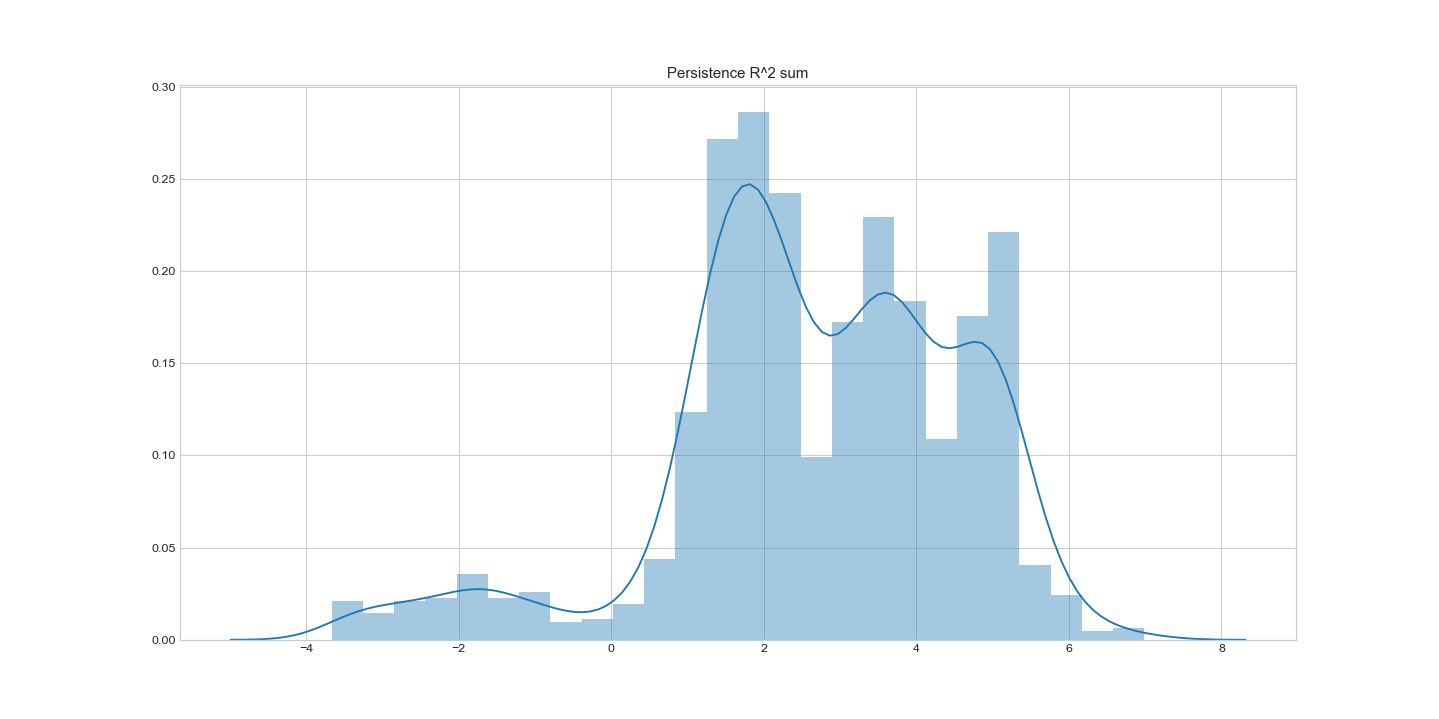

/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [4]:
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_subplot(1, 1, 1)
axes.set_title('Persistence R^2 sum')
sn.distplot(valsum)

In [5]:
mymap = folium.Map(location=[coords[sites1[0],0], coords[sites1[0],1]], zoom_start=6, width=1000,
                   height=700,tiles='Stamen Terrain')

for i, e in zip(sites1,coord1):
    folium.features.CircleMarker(
        radius=10,
        location=[coords[i,0], coords[i,1]],
        color='#FFFFFF00',
        fill=True,
        fill_color=to_hex(cpal((np.sum(e)-minsum)/rangesum)),
        fill_opacity=1
    ).add_to(mymap)
    
mymap

In [4]:
pca = PCA()

ncoord1 = pca.fit_transform(coord1)

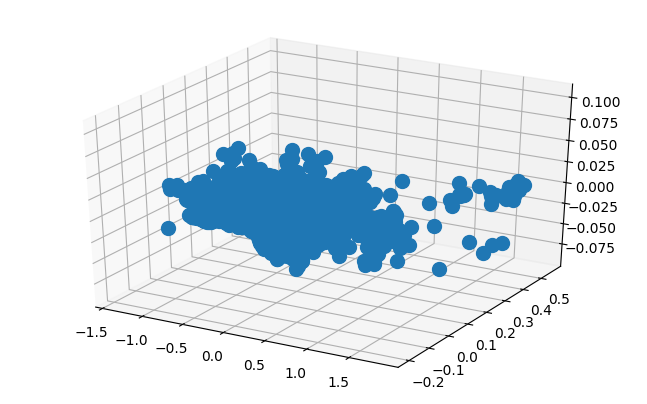

In [5]:
fig = plt.figure(figsize=(8, 5), dpi=100)

ax = fig.add_subplot(111, projection='3d')
plt.scatter(ncoord1[:, 0], ncoord1[:, 1], zs=ncoord1[:, 2], depthshade=False, s=100)
plt.show()

[0 1 2 3 4 5 6 7 8 9]


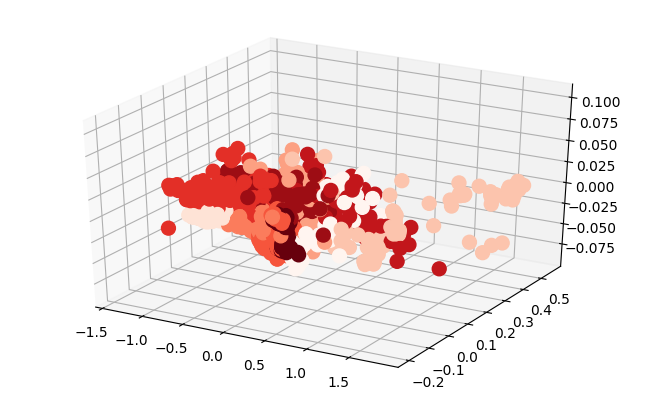

In [6]:
#dbs = DBSCAN(eps=0.1, min_samples=10)
dbs = BayesianGaussianMixture(10, max_iter=1000)

dbs.fit(ncoord1)
labels1 = dbs.predict(ncoord1)

print(np.unique(labels1))
ncl = len(np.unique(labels1))

fig = plt.figure(figsize=(8, 5), dpi=100)

ax = fig.add_subplot(111, projection='3d')
plt.scatter(ncoord1[:, 0], ncoord1[:, 1], zs=ncoord1[:, 2], c=[(l+1.0)/ncl for l in labels1], cmap=cpal, depthshade=False, s=100)
plt.show()



In [7]:

mymap = folium.Map(location=[coords[sites1[0],0], coords[sites1[0],1]], zoom_start=6, width=1000,
                   height=700,tiles='Stamen Terrain')

for i, e in zip(sites1,[(l+1.0)/ncl for l in labels1]):
    folium.features.CircleMarker(
        radius=10,
        location=[coords[i,0], coords[i,1]],
        color='#FFFFFF00',
        fill=True,
        fill_color=to_hex(cpal(e)),
        fill_opacity=1
    ).add_to(mymap)
    
mymap

---

# MLP S2S

In [162]:
query1= {'status':'done', "arch.mode": "mlps2s", "experiment":"eastwest9597"}

count_exp(query1)
res1 = find_exp(query1)
sites1, coord1 = sel_result(res1,1)

valsum = np.sum(coord1,axis=1)
minsum = np.min(valsum)
rangesum = np.max(valsum) - minsum

1500


<IPython.core.display.Javascript object>


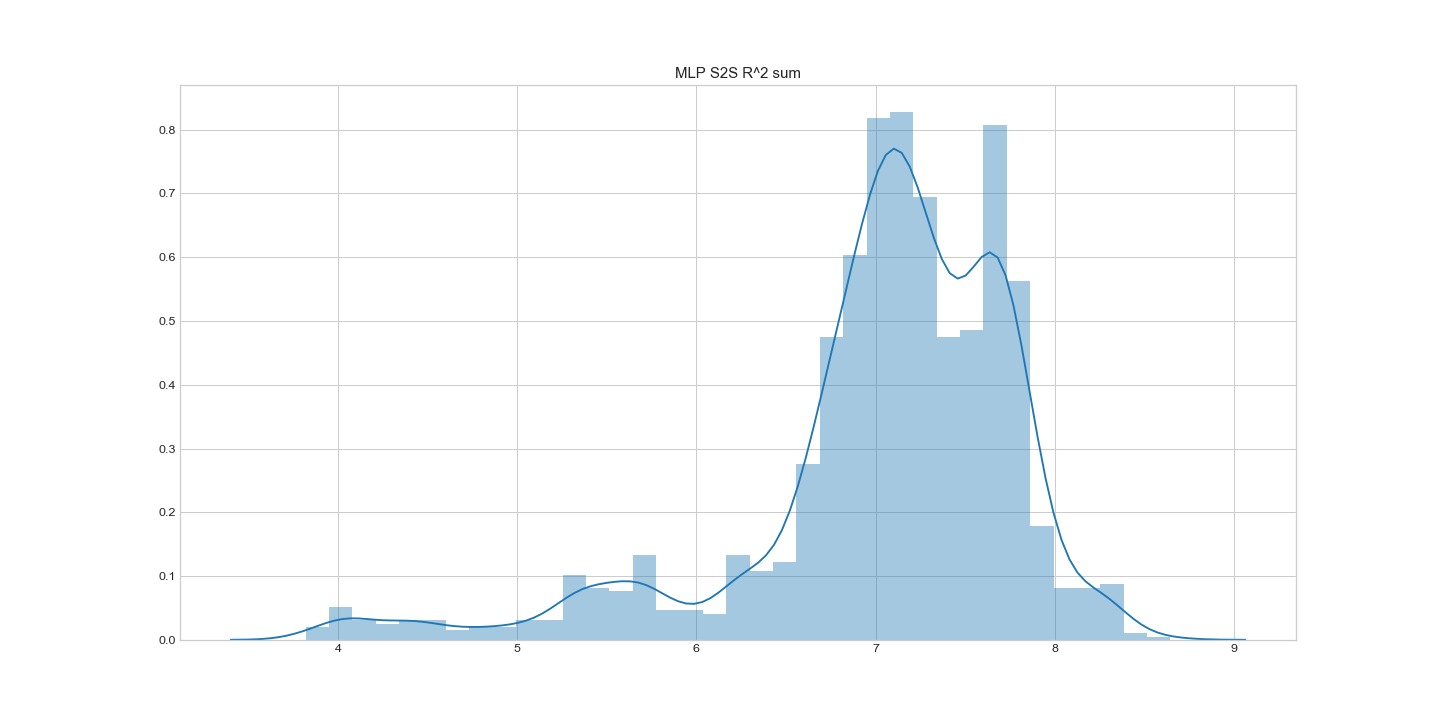

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [163]:
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_subplot(1, 1, 1)
axes.set_title('MLP S2S R^2 sum')
sn.distplot(valsum)

In [9]:
mymap = folium.Map(location=[coords[sites1[0],0], coords[sites1[0],1]], zoom_start=6, width=1000,
                   height=700,tiles='Stamen Terrain')

for i, e in zip(sites1,coord1):
    folium.features.CircleMarker(
        radius=10,
        location=[coords[i,0], coords[i,1]],
        color='#FFFFFF00',
        fill=True,
        fill_color=to_hex(cpal((np.sum(e)-minsum)/rangesum)),
        fill_opacity=1
    ).add_to(mymap)
    
mymap

In [10]:
pca = PCA()

ncoord1 = pca.fit_transform(coord1)

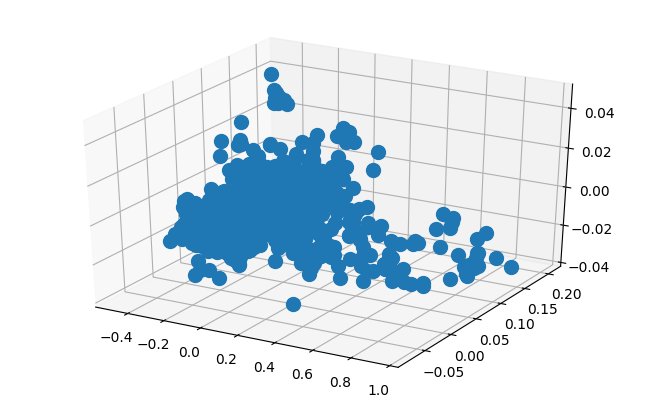

In [11]:
fig = plt.figure(figsize=(8, 5), dpi=100)

ax = fig.add_subplot(111, projection='3d')
plt.scatter(ncoord1[:, 0], ncoord1[:, 1], zs=ncoord1[:, 2], depthshade=False, s=100)
plt.show()

[0 1 2 3 4]


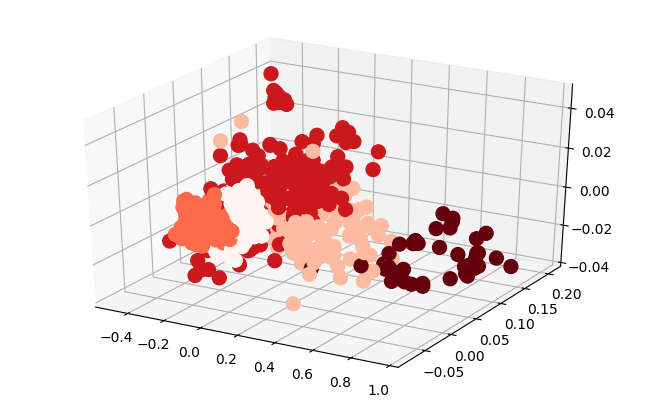

In [12]:
#dbs = DBSCAN(eps=0.04, min_samples=15)

dbs = BayesianGaussianMixture(5, max_iter=1000)

dbs.fit(coord1)
labels1 = dbs.predict(coord1)
print(np.unique(labels1))
ncl = len(np.unique(labels1))

fig = plt.figure(figsize=(8, 5), dpi=100)

ax = fig.add_subplot(111, projection='3d')
plt.scatter(ncoord1[:, 0], ncoord1[:, 1], zs=ncoord1[:, 2], c=[(l+1.0)/ncl for l in labels1], cmap=cpal, depthshade=False, s=100)
plt.show()



In [13]:

mymap = folium.Map(location=[coords[sites1[0],0], coords[sites1[0],1]], zoom_start=6, width=1000,
                   height=700,tiles='Stamen Terrain')

for i, e in zip(sites1,[(l+1.0)/ncl for l in labels1]):
    folium.features.CircleMarker(
        radius=5,
        location=[coords[i,0], coords[i,1]],
        color='#FFFFFF00',
        fill=True,
        fill_color=to_hex(cpal(e)),
        fill_opacity=1
    ).add_to(mymap)
    
mymap

# RNN direct regression

In [164]:
query1= {'status':'done', "arch.mode": "regdir", "experiment":"eastwest9597"}

count_exp(query1)
res1 = find_exp(query1)
sites1, coord1 = sel_result(res1,1)

valsum = np.sum(coord1,axis=1)
minsum = np.min(valsum)
rangesum = np.max(valsum) - minsum



1500


<IPython.core.display.Javascript object>


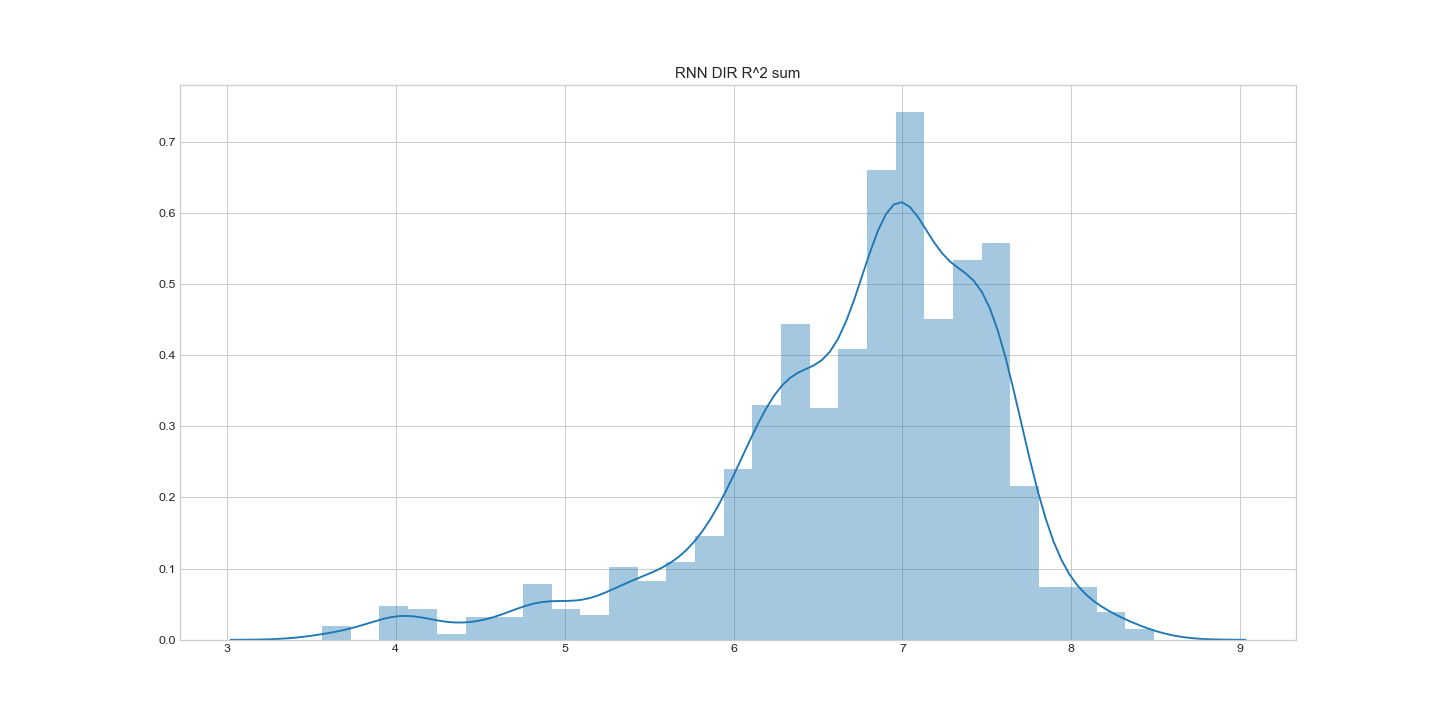

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [165]:
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_subplot(1, 1, 1)
axes.set_title('RNN DIR R^2 sum')
sn.distplot(valsum)

In [15]:
mymap = folium.Map(location=[coords[sites1[0],0], coords[sites1[0],1]], zoom_start=6, width=1000,
                   height=700,tiles='Stamen Terrain')

for i, e in zip(sites1,coord1):
    folium.features.CircleMarker(
        radius=10,
        location=[coords[i,0], coords[i,1]],
        color='#FFFFFF00',
        fill=True,
        fill_color=to_hex(cpal((np.sum(e)-minsum)/rangesum)),
        fill_opacity=1
    ).add_to(mymap)
    
mymap

In [16]:
pca = PCA()

ncoord1 = pca.fit_transform(coord1)

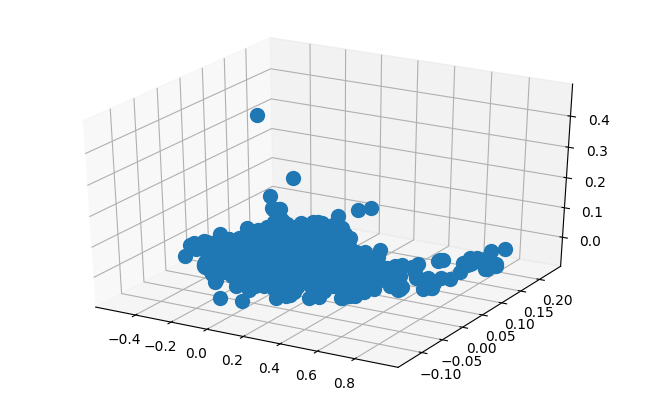

In [17]:
fig = plt.figure(figsize=(8, 5), dpi=100)

ax = fig.add_subplot(111, projection='3d')
plt.scatter(ncoord1[:, 0], ncoord1[:, 1], zs=ncoord1[:, 2], depthshade=False, s=100)
plt.show()

[0 1 2 3 4]


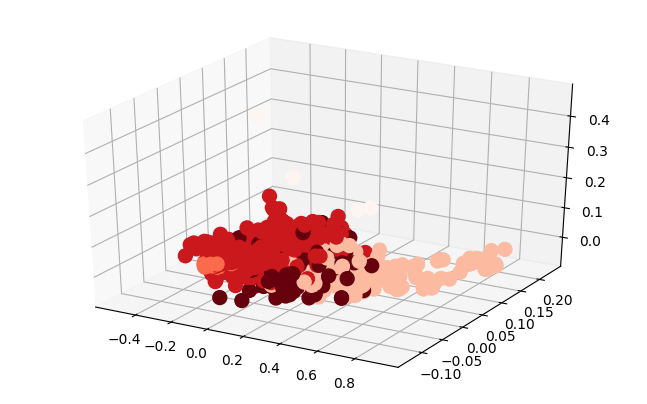

In [18]:
#dbs = DBSCAN(eps=0.04, min_samples=15)

dbs = BayesianGaussianMixture(5, max_iter=1000)

dbs.fit(coord1)
labels1 = dbs.predict(coord1)
print(np.unique(labels1))
ncl = len(np.unique(labels1))

fig = plt.figure(figsize=(8, 5), dpi=100)

ax = fig.add_subplot(111, projection='3d')
plt.scatter(ncoord1[:, 0], ncoord1[:, 1], zs=ncoord1[:, 2], c=[(l+1.0)/ncl for l in labels1], cmap=cpal, depthshade=False, s=100)
plt.show()



In [19]:

mymap = folium.Map(location=[coords[sites1[0],0], coords[sites1[0],1]], zoom_start=6, width=1000,
                   height=700,tiles='Stamen Terrain')

for i, e in zip(sites1,[(l+1.0)/ncl for l in labels1]):
    folium.features.CircleMarker(
        radius=5,
        location=[coords[i,0], coords[i,1]],
        color='#FFFFFF00',
        fill=True,
        fill_color=to_hex(cpal(e)),
        fill_opacity=1
    ).add_to(mymap)
    
mymap

# RNN seq2seq

In [166]:
query1= {'status':'done', "arch.mode": "seq2seq", "experiment":"eastwest9597"}

count_exp(query1)
res1 = find_exp(query1)
sites1, coord1 = sel_result(res1,1)

valsum = np.sum(coord1,axis=1)
minsum = np.min(valsum)
rangesum = np.max(valsum) - minsum



1500


<IPython.core.display.Javascript object>


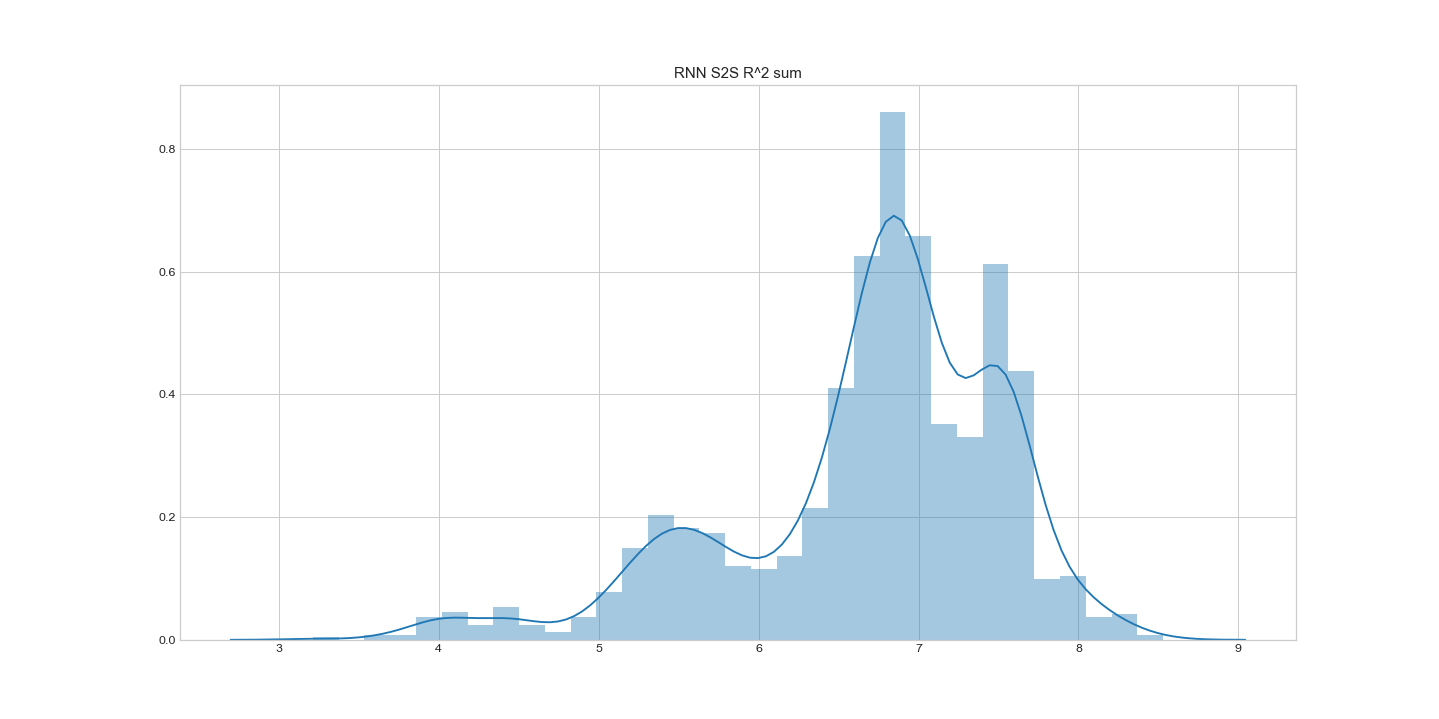

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [167]:
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_subplot(1, 1, 1)
axes.set_title('RNN S2S R^2 sum')
sn.distplot(valsum)

In [144]:
mymap = folium.Map(location=[coords[sites1[0],0], coords[sites1[0],1]], zoom_start=6, width=1000,
                   height=700,tiles='Stamen Terrain')

for i, e in zip(sites1,coord1):
    folium.features.CircleMarker(
        radius=10,
        location=[coords[i,0], coords[i,1]],
        color='#FFFFFF00',
        fill=True,
        fill_color=to_hex(cpal((np.sum(e)-minsum)/rangesum)),
        fill_opacity=1
    ).add_to(mymap)
    
mymap

In [145]:
pca = PCA()

ncoord1 = pca.fit_transform(coord1)

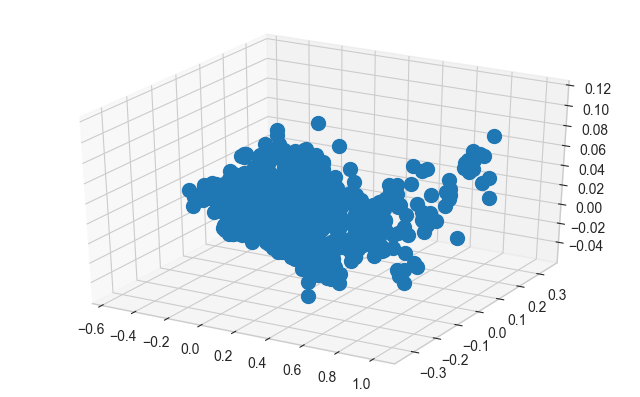

In [146]:
fig = plt.figure(figsize=(8, 5), dpi=100)

ax = fig.add_subplot(111, projection='3d')
plt.scatter(ncoord1[:, 0], ncoord1[:, 1], zs=ncoord1[:, 2], depthshade=False, s=100)
plt.show()

[0 1 2 3 4]


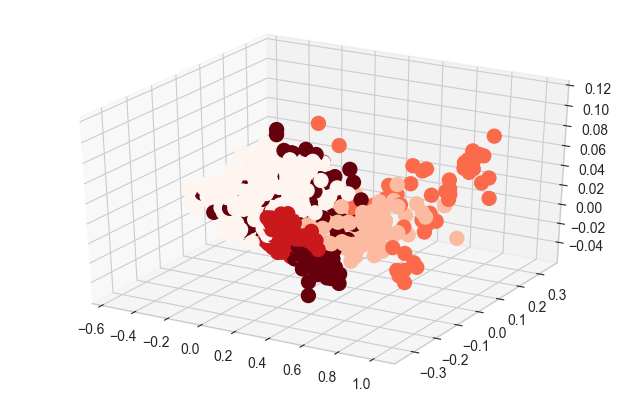

In [147]:
#dbs = DBSCAN(eps=0.04, min_samples=15)

dbs = BayesianGaussianMixture(5, max_iter=1000)

dbs.fit(coord1)
labels1 = dbs.predict(coord1)
print(np.unique(labels1))
ncl = len(np.unique(labels1))

fig = plt.figure(figsize=(8, 5), dpi=100)

ax = fig.add_subplot(111, projection='3d')
plt.scatter(ncoord1[:, 0], ncoord1[:, 1], zs=ncoord1[:, 2], c=[(l+1.0)/ncl for l in labels1], cmap=cpal, depthshade=False, s=100)
plt.show()



In [148]:

mymap = folium.Map(location=[coords[sites1[0],0], coords[sites1[0],1]], zoom_start=6, width=1000,
                   height=700,tiles='Stamen Terrain')

for i, e in zip(sites1,[(l+1.0)/ncl for l in labels1]):
    folium.features.CircleMarker(
        radius=5,
        location=[coords[i,0], coords[i,1]],
        color='#FFFFFF00',
        fill=True,
        fill_color=to_hex(cpal(e)),
        fill_opacity=1
    ).add_to(mymap)
    
mymap

# distrib

In [149]:
period = 1

query1= {'status':'done', "arch.mode": "mlps2s", "experiment":"eastwest9597"}

count_exp(query1)
res1 = find_exp(query1)
sites1, coord1 = sel_result(res1,period)

query2= {'status':'done', "arch.mode": "regdir", "experiment":"eastwest9597"}

count_exp(query2)
res2 = find_exp(query2)
sites2, coord2 = sel_result(res2,period)

query3= {'status':'done', "arch.mode": "seq2seq", "experiment":"eastwest9597"}

count_exp(query3)
res3 = find_exp(query3)
sites3, coord3 = sel_result(res3,period)

query4= {'status':'done', "arch.mode": "persistence", "experiment":"eastwest9597"}

count_exp(query4)
res4 = find_exp(query4)
sites4, coord4 = sel_result(res4,period)

1500
1500
1500
1500


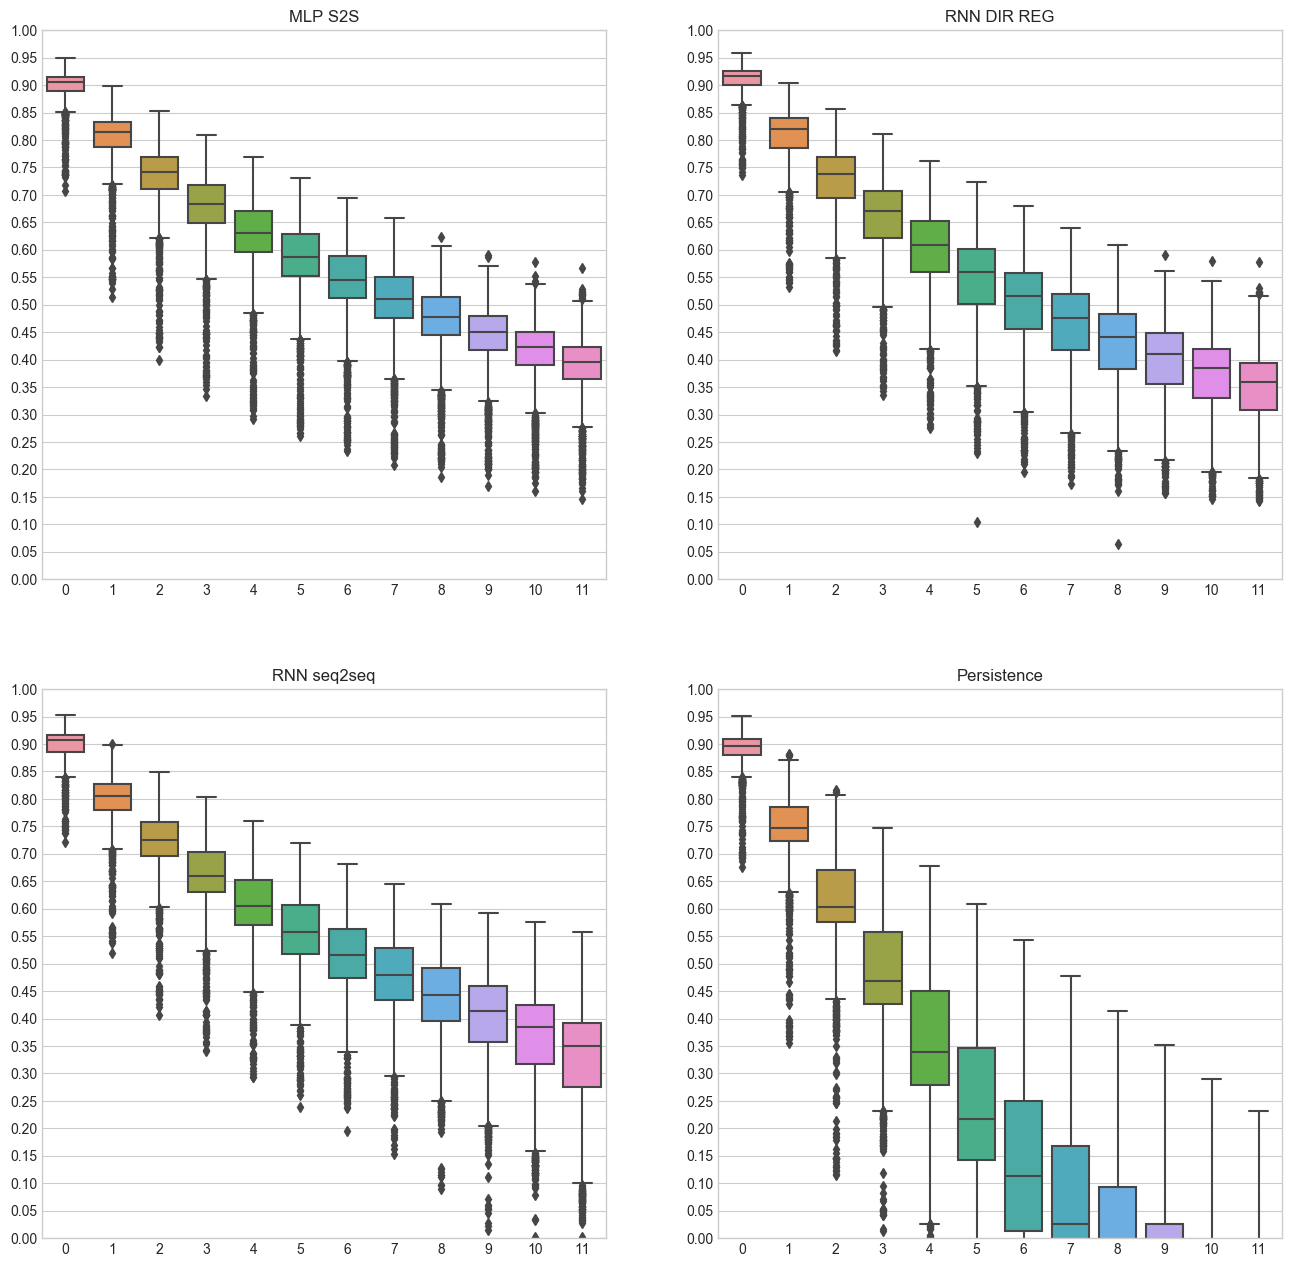

In [150]:


sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 16), dpi=100)

axes = fig.add_subplot(2, 2, 1)
axes.set_title('MLP S2S')
axes.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
sn.boxplot(data=coord1)
plt.ylim(0, 1)

axes = fig.add_subplot(2, 2, 2)
axes.set_title('RNN DIR REG')
axes.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
sn.boxplot(data=coord2)
plt.ylim(0, 1)

axes = fig.add_subplot(2, 2, 3)
axes.set_title('RNN seq2seq')
axes.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
sn.boxplot(data=coord3)

plt.ylim(0, 1)
axes = fig.add_subplot(2, 2, 4)
axes.set_title('Persistence')
axes.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
sn.boxplot(data=coord4)
plt.ylim(0, 1);

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


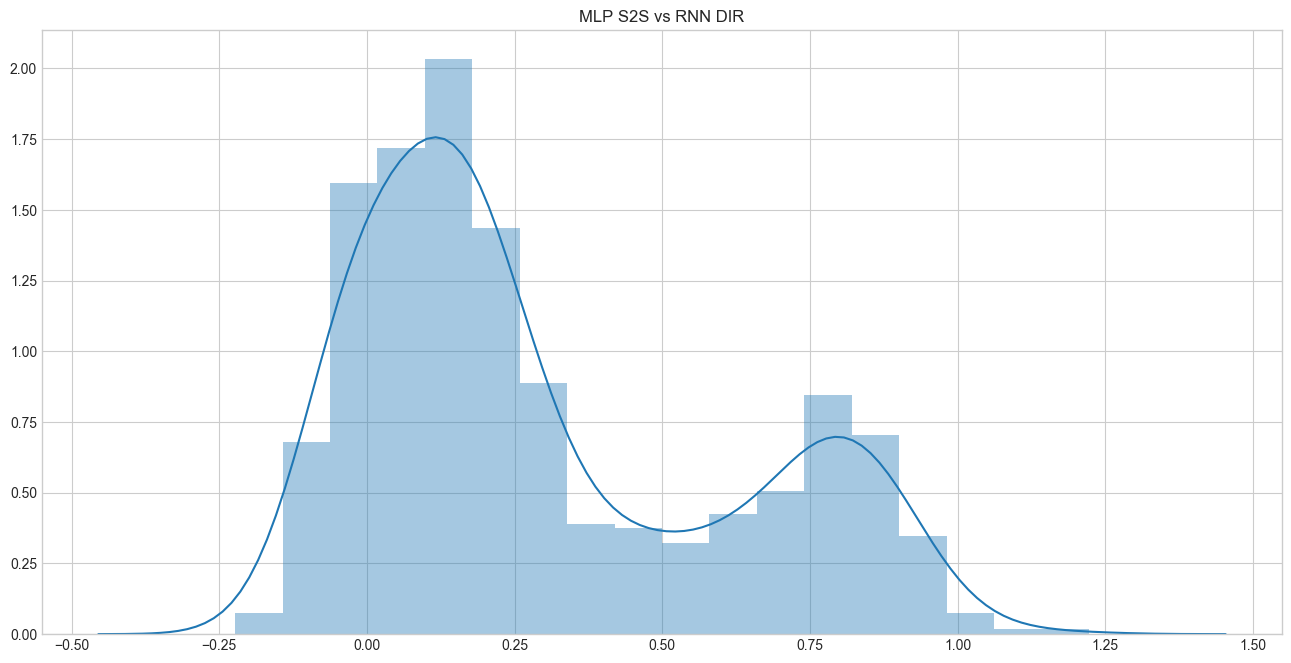

In [158]:
vdiff = [np.sum(v1[:]-v2[:]) for v1, v2 in zip(coord1, coord2)]
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_subplot(1, 1, 1)
axes.set_title('MLP S2S vs RNN DIR')
#axes.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
sn.distplot(vdiff)
#plt.ylim(0, 1)


/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


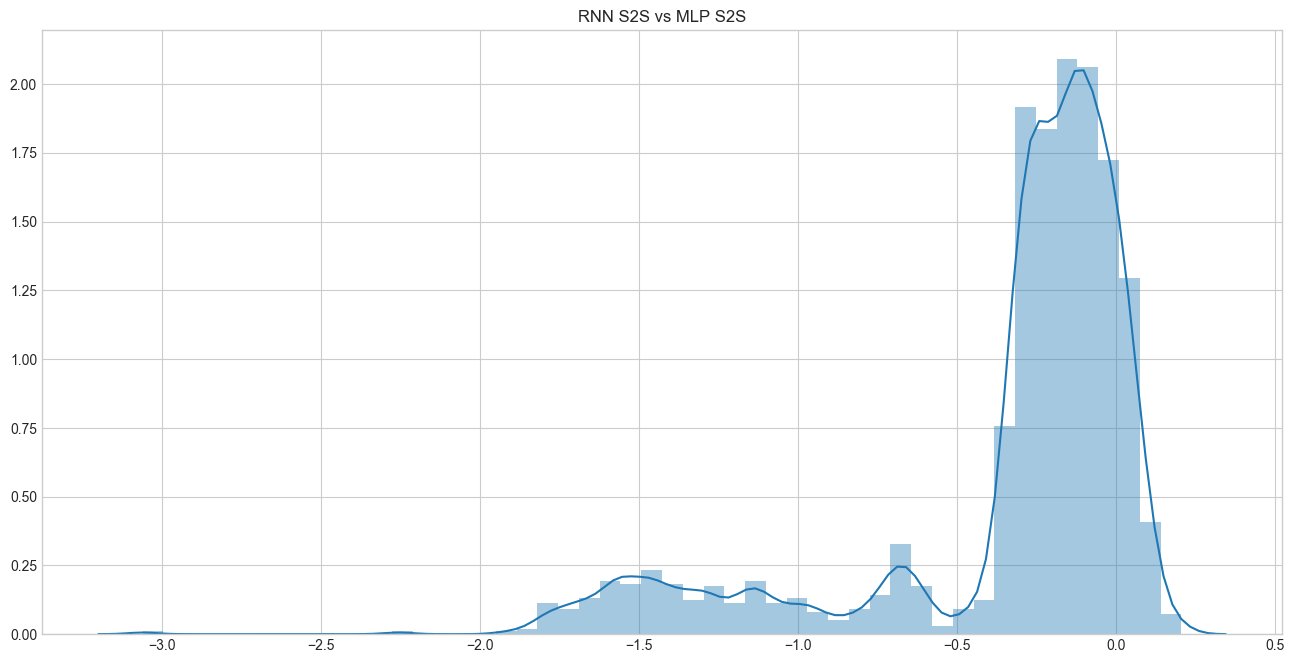

In [157]:
vdiff = [np.sum(v1[:]-v2[:]) for v1, v2 in zip(coord3, coord1)]
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_subplot(1, 1, 1)
axes.set_title('RNN S2S vs MLP S2S')
#axes.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
sn.distplot(vdiff)
#plt.ylim(0, 1)

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


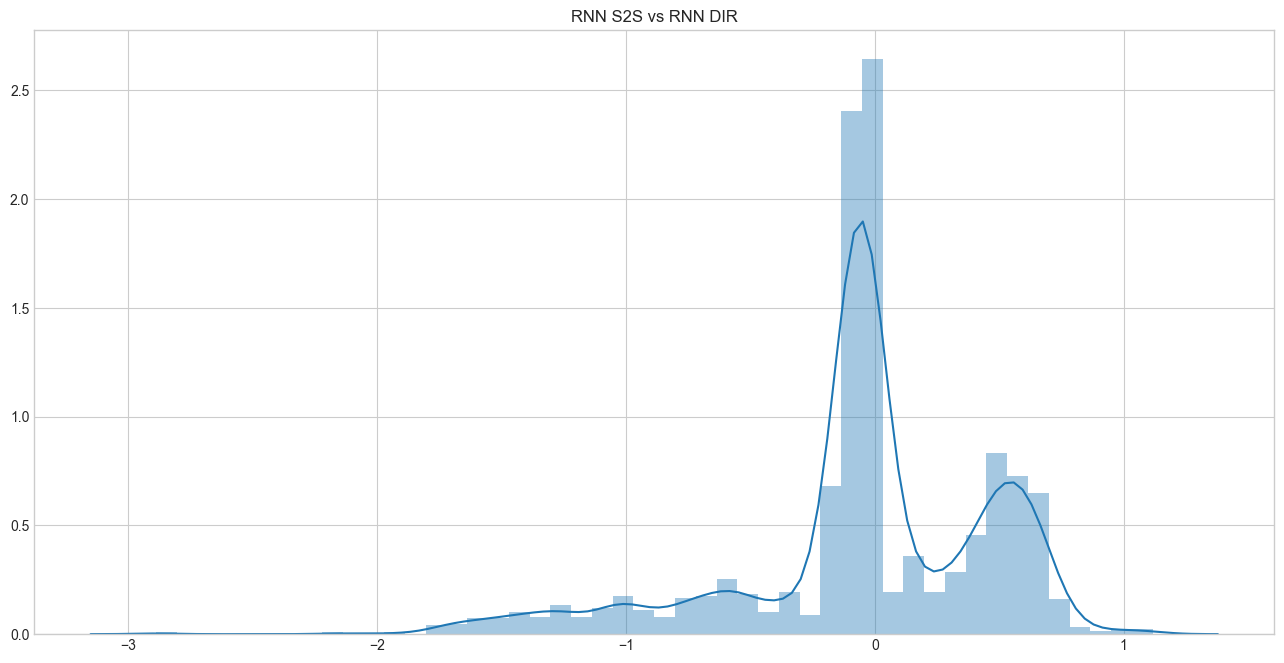

In [156]:
vdiff = [np.sum(v1[:]-v2[:]) for v1, v2 in zip(coord3, coord2)]
sn.set_style("whitegrid")
fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_subplot(1, 1, 1)
axes.set_title('RNN S2S vs RNN DIR')
#axes.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
sn.distplot(vdiff)
#plt.ylim(0, 1)